### Seam Carving - Funções

In [4]:
import cv2
import numpy as np
import seamcarving_horizontal_vertical as my_seamcarving
import matplotlib.pyplot as plt

### Callback para selecionar o objeto na tela


In [5]:
# Variáveis globais para armazenar os pontos, status e tipo de forma
start_point = None
end_point = None
drawing = False
drawing_shape = 'r'  # 'r' para retângulo, 'c' para círculo

# Função para capturar o clique e arrastar
def cb_select_area(event, x, y, flags, param):
    global start_point, end_point, drawing
    img_original = param.copy()
    
    # Quando o botão esquerdo do mouse é pressionado, o desenho começa
    if event == cv2.EVENT_LBUTTONDOWN:
        start_point = (x, y)
        drawing = True

    # Quando o mouse é movido e o desenho está ativo
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            copy = img_original.copy()
            end_point = (x, y)
            if drawing_shape == 'r':  # Se for retângulo
                cv2.rectangle(copy, start_point, end_point, (0, 255, 0), 2)
            elif drawing_shape == 'c':  # Se for círculo
                radius = int(((end_point[0] - start_point[0]) ** 2 + (end_point[1] - start_point[1]) ** 2) ** 0.5)
                cv2.circle(copy, start_point, radius, (0, 255, 0), 2)
            cv2.imshow('image', copy)

    # Quando o botão esquerdo é solto, o desenho termina
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        end_point = (x, y)
        if drawing_shape == 'r':  # Se for retângulo
            cv2.rectangle(img_original, start_point, end_point, (0, 255, 0), 2)
        elif drawing_shape == 'c':  # Se for círculo
            radius = int(((end_point[0] - start_point[0]) ** 2 + (end_point[1] - start_point[1]) ** 2) ** 0.5)
            cv2.circle(img_original, start_point, radius, (0, 255, 0), 2)
        cv2.imshow('image', img_original)

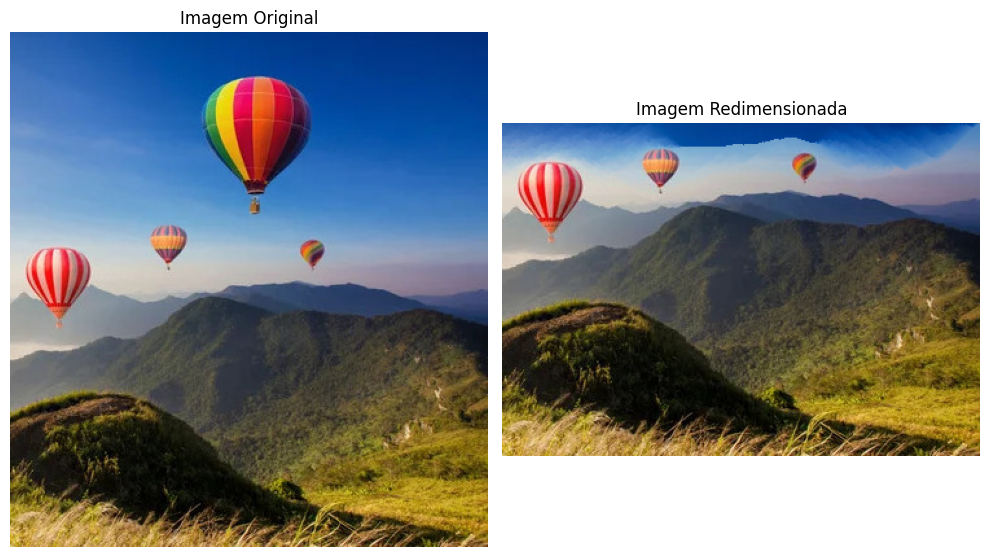

In [6]:
img = cv2.imread("./baloes_cropped.jpg")
img_copy = img.copy()

# Exibir a imagem e configurar o callback do mouse
cv2.imshow('image', img)
cv2.setMouseCallback('image', cb_select_area, img_copy)

# Loop principal para alternar entre retângulo e círculo com as teclas 'r' e 'c'
while True:
    key = cv2.waitKey(1) & 0xFF
    if key == 27:  # Tecla ESC para sair
        break
    elif key == ord('r'):  # Alterna para retângulo
        drawing_shape = 'r'
        print("Desenhando retângulo")
    elif key == ord('c'):  # Alterna para círculo
        drawing_shape = 'c'
        print("Desenhando círculo")

cv2.destroyAllWindows()

# Criar a máscara da área selecionada
mask = np.zeros(img.shape[:2], dtype=np.uint8)
if drawing_shape == 'r':  # Se for retângulo
    cv2.rectangle(mask, start_point, end_point, 255, -1)  # 255 preenche a área do retângulo
elif drawing_shape == 'c':
    # Calcular o raio do círculo com base nos pontos inicial (centro) e final
    radius = int(((end_point[0] - start_point[0]) ** 2 + (end_point[1] - start_point[1]) ** 2) ** 0.5)
    # Desenhar um círculo preenchido na máscara
    cv2.circle(mask, start_point, radius, 255, -1)  # 255 preenche a área do círculo

cv2.imshow('mask', mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Aplicar a operação de seam carving
# img_seamcarved = my_seamcarving.seam_carving(img, 100*2, 'both', mask)
img_seamcarved = my_seamcarving.seam_carving(img, 140, 'horizontal', mask)

# Exibir a imagem resultante
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(122)
plt.imshow(cv2.cvtColor(img_seamcarved, cv2.COLOR_BGR2RGB))
plt.title('Imagem Redimensionada')
plt.axis('off')

plt.tight_layout()
plt.show()

